In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install opendatasets
!pip install pandas

In [4]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")  #veri sseti copy API command

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aysegulbulbul
Your Kaggle Key: ··········


100%|██████████| 612M/612M [00:31<00:00, 20.4MB/s]


#1. Kütüphaneleri ekliyorum.

In [5]:
import numpy as np                                   # temel bir dizi -> bilimsel hesaplamalar için kullanılan bir kütüphanedir.
import pandas as pd                                  # veri manipülasyonu ve analizi
import matplotlib.pyplot as plt                      # veri görselleştirme -> grafik çizimleri
import cv2                                           # görüntü işleme ve bilgisayarlı görü
import tensorflow as tf                              # derin öğrenme için kullanılır
from PIL import Image                                # pythondaki manipüle görüntüleri alıp sayı dizesine dönüştürür.
import os                                            # işletim sistemi işlemleri için kullanılır.
from sklearn.model_selection import train_test_split   # Scikit-learn kütüphanesinden train_test_split fonksiyonunu içe aktarır.
                                                       # Bu fonksiyon, veri kümesini eğitim ve test alt kümelerine bölmek için kullanılır.
from keras.utils import to_categorical                 # yüksek düzeyli bir yapay sinir ağı kütüphanesidir.
from keras.models import Sequential, load_model        # Keras'tan Sequential ve load_model sınıflarını içe aktarır.
                                                       # Sequential, sıralı yapay sinir ağı modelleri oluşturmak için kullanılır.
                                                       # load_model, önceden kaydedilmiş bir Keras modelini yüklemek için kullanılır.
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout   # Bu katmanlar, yapay sinir ağı mimarisini oluşturmak için kullanılır.
import tqdm                                            # döngü işlemlerinin ilerlemesini görsel olarak göstermek için kullanılan
import warnings

#2. Görüntüleri alma

Görüntüleri ve etiketlerini alacağız. Ardından, tüm görüntülerin tanınması için aynı boyuta sahip olması gerektiğinden, görüntüleri (30,30) olarak yeniden boyutlandırın. Ardından görüntüleri numpy dizisine dönüştürüyoruz.

In [6]:
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(os.getcwd(),'/content/gtsrb-german-traffic-sign/train',str(i)) #os.getcwd -> yolu kendi alıyor
    images = os.listdir(path)

    for j in images:
        try:
            image = Image.open(path + '//'+ j)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays bcoz its faster and takes lesser #memory
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [7]:
#Listeleri numpy dizilerine dönüştürmek daha hızlı ve daha az bellek alır
data = np.array(data)
labels = np.array(labels)

In [8]:
print(data.shape, labels.shape)
# Toplam Görüntüler: Boyut 39209 (30*30*3 (3 renk anlamına gelir))

(39209, 30, 30, 3) (39209,)


In [9]:
data[39000] #zirve

array([[[14, 12, 16],
        [14, 12, 18],
        [13, 12, 16],
        ...,
        [35, 38, 41],
        [40, 45, 51],
        [34, 40, 46]],

       [[15, 13, 16],
        [14, 13, 18],
        [14, 14, 17],
        ...,
        [32, 33, 36],
        [30, 32, 38],
        [27, 28, 36]],

       [[14, 13, 16],
        [13, 12, 16],
        [13, 12, 14],
        ...,
        [23, 24, 29],
        [23, 23, 24],
        [15, 15, 16]],

       ...,

       [[12, 10, 14],
        [12, 10, 13],
        [11, 10, 13],
        ...,
        [20, 20, 24],
        [17, 16, 17],
        [15, 15, 16]],

       [[11, 11, 14],
        [11, 10, 13],
        [11, 10, 14],
        ...,
        [15, 14, 17],
        [15, 14, 16],
        [12, 13, 14]],

       [[10, 10, 13],
        [11, 10, 12],
        [10,  9, 12],
        ...,
        [10, 10, 13],
        [12, 12, 13],
        [13, 11, 13]]], dtype=uint8)

In [10]:
labels[4900]  # Sonuç:3?

3

#3. Veri kümesini bölme

Veri kümesini eğitim ve test olarak bölün. %80 tren verisi ve %20 test verisi

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #Bu satır, eğitim ve test veri kümesinin boyutlarını ekrana yazdırmak için kullanılır.

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [12]:
#Etiketleri kategorik hale getirerek one-hot encoding işlemini gerçekleştirmek

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


In [13]:
y_train[20000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#4. Modeli oluşturma

In [14]:
# Keras'ta bir sıralı model oluşturuluyor.
# Sıralı model, katmanları ardışık olarak bir araya getirilen basit bir yapay sinir ağıdır.
model = Sequential()

# İlk evrişim katmanı ekleniyor.
# 32 filtre, 5x5 boyutunda bir evrişim çekirdeği ve ReLU aktivasyon fonksiyonu kullanılıyor.
# input_shape, giriş verisinin şeklini (boyutunu) belirliyor ve X_train veri kümesine göre şekillendiriliyor.
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))

# İkinci evrişim katmanı ekleniyor.
# 32 filtre, 5x5 boyutunda bir evrişim çekirdeği ve ReLU aktivasyon fonksiyonu kullanılıyor.
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))

# Maksimum havuzlama (max pooling) katmanı ekleniyor.
# Havuzlama katmanı, evrişim katmanlarından elde edilen öznitelik haritalarını küçültmek ve boyutunu azaltmak için kullanılır.
# 2x2 boyutunda bir havuzlama çekirdeği kullanılıyor.
model.add(MaxPool2D(pool_size=(2, 2)))

# Dropout katmanı ekleniyor.
# Dropout, aşırı uyum (overfitting) riskini azaltmak için kullanılan bir yöntemdir.
# 0.25 dropout oranı, 25% nöronların rastgele atılacağı anlamına gelir.
model.add(Dropout(rate=0.25))

# Üçüncü evrişim katmanı ekleniyor.
# 64 filtre, 3x3 boyutunda bir evrişim çekirdeği ve ReLU aktivasyon fonksiyonu kullanılıyor.
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Dördüncü evrişim katmanı ekleniyor.
# 64 filtre, 3x3 boyutunda bir evrişim çekirdeği ve ReLU aktivasyon fonksiyonu kullanılıyor.
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# İkinci maksimum havuzlama (max pooling) katmanı ekleniyor.
# 2x2 boyutunda bir havuzlama çekirdeği kullanılıyor.
model.add(MaxPool2D(pool_size=(2, 2)))

# İkinci Dropout katmanı ekleniyor.
# 0.25 dropout oranı, 25% nöronların rastgele atılacağı anlamına gelir.
model.add(Dropout(rate=0.25))

# Düzleştirme katmanı ekleniyor.
# Evrişim ve havuzlama katmanlarından elde edilen çıkışlar düzleştirilerek (flatten) tek boyutlu bir vektör haline getirilir.
model.add(Flatten())

# Tamamen bağlı (dense) katman ekleniyor.
# 256 nöron ve ReLU aktivasyon fonksiyonu kullanılıyor.
model.add(Dense(256, activation='relu'))

# Üçüncü Dropout katmanı ekleniyor.
# 0.5 dropout oranı, 50% nöronların rastgele atılacağı anlamına gelir.
model.add(Dropout(rate=0.5))

# Çıkış katmanı ekleniyor.
# 43 sınıfın olası olduğu bir çok sınıflı sınıflandırma görevi olduğu için softmax aktivasyon fonksiyonu kullanılıyor.
model.add(Dense(43, activation='softmax'))

warnings.filterwarnings("ignore", category=DeprecationWarning)

#5. Modeli uygulayın ve grafikleri doğruluk ve kayıp için çizilir.

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [17]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))
#Modelin son eğitimi
''' bu kod satırı, belirtilen modeli eğitir ve eğitim sürecinde eğitim ve doğrulama veri kümesi üzerindeki performansı hakkında bilgi
sağlayan bir geçmiş nesnesini döndürür. Bu geçmiş nesnesi, eğitim sırasında modelin kaybı ve doğruluğu gibi metrikleri takip etmeye
olanak tanır ve sonuçların analiz edilmesi ve modelin iyileştirilmesi için kullanılabilir.'''

warnings.filterwarnings("ignore", category=DeprecationWarning)

Epoch 1/10
981/981 [==============================] - 19s 6ms/step - loss: 2.1767 - accuracy: 0.4273 - val_loss: 0.7870 - val_accuracy: 0.7988
Epoch 2/10
981/981 [==============================] - 6s 6ms/step - loss: 0.8138 - accuracy: 0.7607 - val_loss: 0.2717 - val_accuracy: 0.9301
Epoch 3/10
981/981 [==============================] - 5s 6ms/step - loss: 0.5256 - accuracy: 0.8452 - val_loss: 0.2093 - val_accuracy: 0.9485
Epoch 4/10
981/981 [==============================] - 6s 7ms/step - loss: 0.4132 - accuracy: 0.8793 - val_loss: 0.1231 - val_accuracy: 0.9686
Epoch 5/10
981/981 [==============================] - 5s 6ms/step - loss: 0.3555 - accuracy: 0.8971 - val_loss: 0.1608 - val_accuracy: 0.9602
Epoch 6/10
981/981 [==============================] - 6s 7ms/step - loss: 0.3452 - accuracy: 0.9021 - val_loss: 0.1511 - val_accuracy: 0.9568
Epoch 7/10
981/981 [==============================] - 6s 6ms/step - loss: 0.3131 - accuracy: 0.9141 - val_loss: 0.0904 - val_accuracy: 0.9777
Epoch

In [18]:
model.save("Trafic_signs_model.h5")

DOĞRULUK İÇİN GRAFİKLERİ ÇİZME


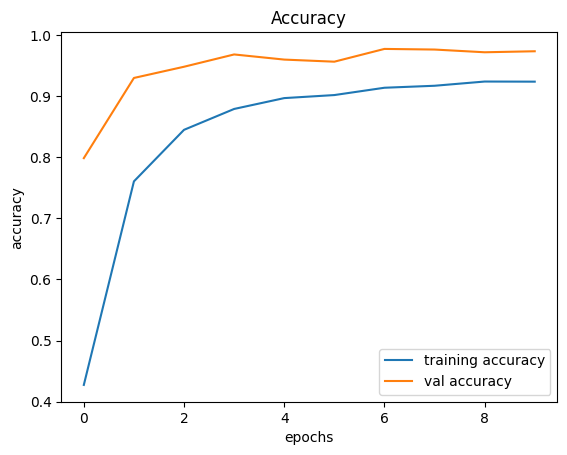

In [19]:

plt.figure(0)   # Yeni bir grafik penceresi oluşturuluyor (figure(0)).

plt.plot(history.history['accuracy'], label='training accuracy')  # Eğitim verisi üzerinde yapılan her bir epokt (eğitim adımı) için elde edilen doğruluk (accuracy) değerleri çizdiriliyor.
                                                                  # history.history sözlüğünden 'accuracy' anahtarının değeri kullanılıyor.

plt.plot(history.history['val_accuracy'], label='val accuracy')   # Doğrulama verisi üzerinde yapılan her bir epokt (eğitim adımı) için elde edilen doğruluk (accuracy) değerleri çizdiriliyor.
                                                                  # history.history sözlüğünden 'val_accuracy' anahtarının değeri kullanılıyor.

plt.title('Accuracy')  # Grafik başlığı belirleniyor.

plt.xlabel('epochs')   # X eksenine etiket (label) ekleniyor.

plt.ylabel('accuracy') # Y eksenine etiket (label) ekleniyor.

plt.legend()   # Grafikteki çizgilerin neyi temsil ettiği açıklamaları için etiketler belirleniyor.
               # 'training accuracy' etiketi eğitim verisindeki doğruluğu, 'val accuracy' etiketi ise doğrulama verisindeki doğruluğu temsil eder.

plt.show()     # Oluşturulan grafikleri göstermek için plt.show() fonksiyonu çağrılıyor.



KAYIP İÇİN GRAFİKLER ÇİZME

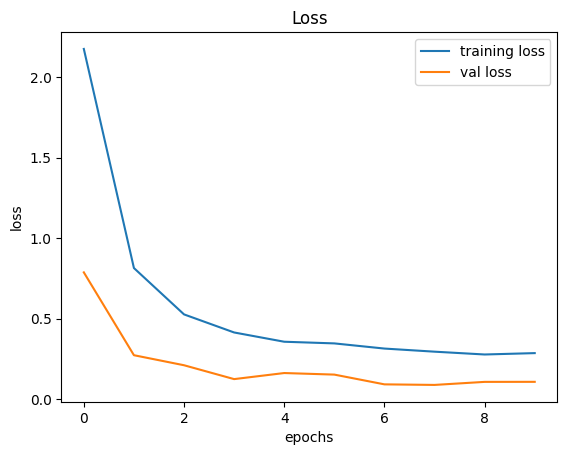

In [20]:
plt.figure(1) # Yeni bir grafik penceresi oluşturuluyor (figure(1)).


plt.plot(history.history['loss'], label='training loss')      # Eğitim verisi üzerinde yapılan her bir epokt (eğitim adımı) için elde edilen kayıp (loss) değerleri çizdiriliyor.
                                                              # history.history sözlüğünden 'loss' anahtarının değeri kullanılıyor.


plt.plot(history.history['val_loss'], label='val loss')       # Doğrulama verisi üzerinde yapılan her bir epokt (eğitim adımı) için elde edilen kayıp (loss) değerleri çizdiriliyor.
                                                              # history.history sözlüğünden 'val_loss' anahtarının değeri kullanılıyor.


plt.title('Loss') # Grafik başlığı belirleniyor.

plt.xlabel('epochs') # X eksenine etiket (label) ekleniyor.

plt.ylabel('loss') # Y eksenine etiket (label) ekleniyor.


plt.legend()      # Grafikteki çizgilerin neyi temsil ettiği açıklamaları için etiketler belirleniyor.
                  # 'training loss' etiketi eğitim verisindeki kaybı (loss) temsil eder, 'val loss' etiketi ise doğrulama verisindeki kaybı (loss) temsil eder.

plt.show()        # Oluşturulan grafikleri göstermek için plt.show() fonksiyonu çağrılıyor.



#6.Test setinde doğruluk

In [21]:
#Test veri kümesinde tespit doğruluğu
#"accuracy_score", sınıflandırma modelinin tahminlerini gerçek etiketlerle karşılaştırarak doğruluk (accuracy) skorunu hesaplamak için kullanılır.
from sklearn.metrics import accuracy_score #

In [22]:
print(os.getcwd())

/content


In [23]:
os.chdir("gtsrb-german-traffic-sign")

In [25]:
#Bu kod, önceden eğitilmiş bir modelin test veri kümesi üzerinde tahminler yapmasını sağlar.

#y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values
print(imgs)
data=[] # Boş bir liste olan "data" oluşturulur. Bu liste, resim verilerini içerecektir.

for img in imgs:                    # Tüm test resimlerini işlemek için bir döngü başlatılır.
    image = Image.open(img)        # Her resmin dosya yolundan yola çıkılarak, "Image" modülü kullanılarak resim açılır.
    image = image.resize((30,30))
    data.append(np.array(image))    # İşlenmiş resim, "data" listesine NumPy dizisi olarak eklenir. Bu adım, modele giriş için veri hazırlamak amacıyla yapılır.

X_test=np.array(data)  # "data" listesi NumPy dizisine dönüştürülerek "X_test" değişkenine atanır. "X_test", modelin tahminlerini yapmak için kullanılacak test veri kümesinin girişini temsil eder.
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
#pred = model.predict_classes(X_test)   #  Model, "X_test" veri kümesini kullanarak sınıf etiketlerini tahmin eder. "model.predict_classes" işlevi, modelin tahminlerini döndürür ve "pred" değişkenine atanır.

'''Sonuç olarak, bu kod, modelin test veri kümesi üzerinde tahminler yapmasını sağlar ve bu tahminleri "pred" değişkeninde saklar.'''
'''Bu tahminler daha sonra modelin performansını değerlendirmek veya başka analizler için kullanılabilir.'''

IndexError: ignored

In [ ]:
#Test Verileriyle Kesinlik
print(y_test.shape, labels.shape)
print(accuracy_score(labels, classes_x))

# Grafik kullanıcı arayüzü
Şimdi model hazır olduğu için, bir Grafik kullanıcı intrface (GUI) yapılabilir. GUI'yi yapmak için tkinter kütüphanesini kullanıyoruz.

In [ ]:
from PIL import ImageTk, Image
import numpy
from keras.models import load_model
import warnings

model = load_model('/content/Trafic_signs_model.h5')
warnings.filterwarnings("ignore", category=DeprecationWarning)

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing veh > 3.5 tons' }

In [ ]:
#verilen girdiyi sınıflandırmak için fonk.
def classify(file_path):
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = np.argmax(model.predict([image]) > 0.5).astype("int32")
    sign = classes[pred+1]
    print(sign)

classify('Test/00132.png')
classify('Test/00130.png')
classify('Test/00120.png')